# Construct cancer game (hardcode version)

## Testing d input

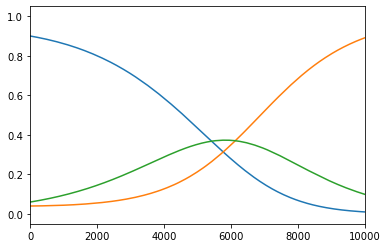

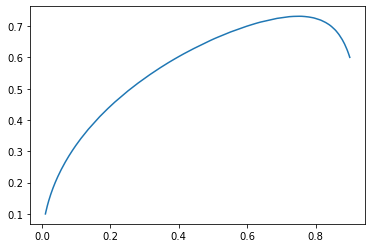

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

xd = 0.04
xg = 0.9
xv = 0.06
ba = 2.5
bv = 2
c = 1
n = 4

xgpoints = [xg]
xdpoints = [xd]
xvpoints = [xv]
ppoints = [xg]
qpoints = [xv/(xv + xd)]

for i in range(50000):
    ngbinomial = np.mean(np.random.binomial(n, xg, 1000))
    multinomial = np.random.multinomial(n, [xg,xv], 1000)
    ngmultinomial = np.mean(multinomial[:,0])
    nv = np.mean(multinomial[:,1])

    wg = (ba*(ngbinomial+1))/(n+1)


    wv = (ba * ngbinomial)/(n + 1) + ( bv *(nv + 1))/(n-ngmultinomial+1) - c
    
    ngbinomial = np.mean(np.random.binomial(n, xg, 1000))
    multinomial = np.random.multinomial(n, [xg,xv], 1000)
    ngmultinomial = np.mean(multinomial[:,0])

    wd = (ba*ngbinomial)/(n+1) + (bv*nv)/(n-ngmultinomial+1)

    w = xg*wg + xv*wv + xd*wd

    xg = xg + (xg * (wg - w)) * 0.001
    xv = xv + (xv * (wv - w)) * 0.001
    xd = xd + (xd * (wd - w)) * 0.001

    xgpoints.append(xg)
    xdpoints.append(xd)
    xvpoints.append(xv)

    q = xv/(xv + xd)
    p = xg

    ppoints.append(p)
    qpoints.append(q)


    # xd = 1 - xg - xv
    # i = i + 0.01

plt.plot(xgpoints, label="GLY")
plt.plot(xdpoints, label="DEF")
plt.plot(xvpoints, label="VOP")
plt.xlim(0, 10000)
plt.show()


plt.plot(ppoints[0:10000], qpoints[0:10000])
plt.show()

## Testing time and differentiation equation

Therapy fail


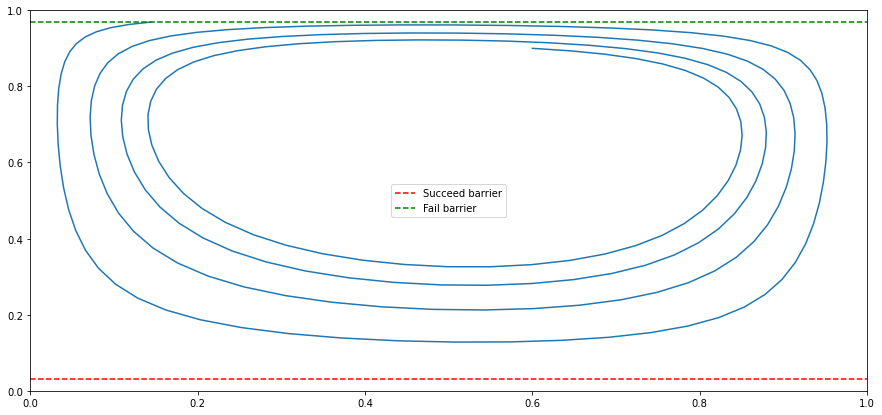

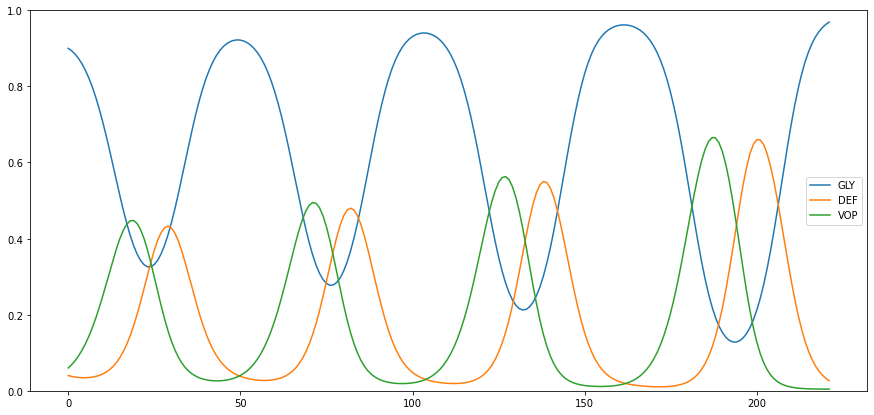

In [7]:
import matplotlib.pyplot as plt
import numpy as np

xd = 0.04
xg = 0.9
xv = 0.06
ba = 2.5
bv = 2
c = 1
n_neigh = 4 

dt = 0.5
d = 0

rb = fb = 10**(-1.5)

xdpoints = [xd]
xgpoints = [xg]
xvpoints = [xv]
ppoints = [xg]
qpoints = [xv/(xv + xd)]

succeed = [rb]
fail = [1-fb]

# def dot_q():
#     return q * (1 - q)(bv/(n+1) * sum_p - c)

# def dot_p():
#     return p * (1 - p)(ba/(n+1) - (bv - c) * q)

for t in range(500):
    # print(xv + xd)
    # print('xv: ', xv)
    # print('xd: ', xd)
    q = xv/(xv + xd)
    p = xg

    sum_p = 0
    for k in range(0, n_neigh):
        sum_p += p**k
    
    q = q + q * (1 - q) * (bv/(n_neigh+1) * sum_p - c) * dt
    # if t >= 50 and t <= 1000:
        # d = 3    
    # if t >= 100 and t <= 20000:
    #     d = 2
    # if t > 20000 and t <= 30000:
    #     d = 3 
    # else:
    #     d = 0
    
    p = p + p * (1 - p) * (ba/(n_neigh+1) - (bv - c) * q - d) * dt

    xd = (1 - q) * (1 - p)
    xg = p
    xv = (1 - p) * q

    ppoints.append(p)
    qpoints.append(q)

    xdpoints.append(xd)
    xgpoints.append(xg)
    xvpoints.append(xv)

    # succeed.append(rb)
    # fail.append(1-fb)

    if p < succeed[0]:
        print("Therapy succeed")
        break
    elif p > fail[0]:
        print("Therapy fail")
        break

plt.figure(figsize=(15,7))
plt.plot(qpoints, ppoints)
plt.axhline(succeed[0], color="r", linestyle='dashed', label="Succeed barrier")
plt.axhline(fail[0], color="g", linestyle='dashed', label="Fail barrier")
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

length = len(xgpoints)
plt.figure(figsize=(15,7))
plt.plot(np.arange(0, length, 1), xgpoints, label="GLY")
plt.plot(np.arange(0, length, 1), xdpoints, label="DEF")
plt.plot(np.arange(0, length, 1), xvpoints, label="VOP")
plt.legend()
plt.ylim(0, 1)
plt.show()

# Cancer game in Python file

Therapy succeed
Time low input:  10000
Time up input:  30000


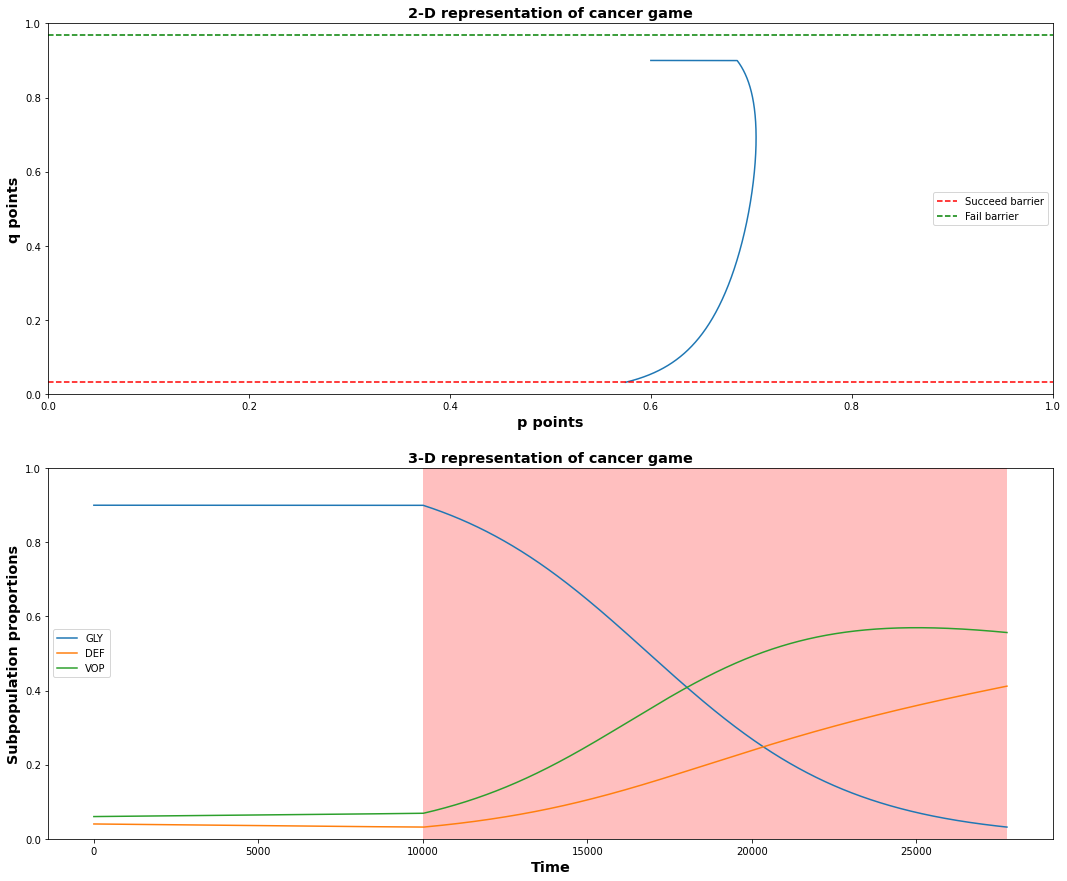

In [1]:
from cancergame import *

game = init_cancerGDV(d = 3, timelow = 10000, timeup=30000, iter=35000)
plt.show()